# Build a Neural Network Regression model on TensorFlow

We'll try to predict the cost of medical insurance for individuals based on a number of different parameters such as: `age`, `sex`, `bmi`, `children`, `smoking_status` and `residential_region`.

To do, we'll leverage the pubically available [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle and [hosted on GitHub](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv).

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.6.0'

In [3]:
insurance = pd.read_csv("insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we'll split data into features (`X`) and labels (`y`)

In [6]:
# Create X & y values: 'charges' is the label vector
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [7]:
X.shape, y.shape

((1338, 11), (1338,))

In [8]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [9]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [10]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [11]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [12]:
# Build a neural network
# Set random state
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# Fit model
model.fit(X_train, y_train, epochs=100)

2021-12-15 11:25:12.484757: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-15 11:25:12.485122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-12-15 11:25:12.574502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-15 11:25:12.578536: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Metal device set to: Apple M1
Epoch 1/100
 1/34 [..............................] - ETA: 14s - loss: 13153.2861 - mae: 13153.2861

2021-12-15 11:25:12.870540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 4ms/step - loss: 8740.5166 - mae: 8740.5166
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7874.9136 - mae: 7874.9136
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.3696 - mae: 7558.3696
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7669.9980 - mae: 7669.9980
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7735.6519 - mae: 7735.6519
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7639.0435 - mae: 7639.0435
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7546.8477 - mae: 7546.8477
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7719.4995 - mae: 7719.4995
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7552.3994 - mae: 7552.3994
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7728.4678 - mae: 7728.4678
Epoch 11/10

34/34 [==============================] - 0s 3ms/step - loss: 7257.3672 - mae: 7257.3672
Epoch 83/100
34/34 [==============================] - 0s 3ms/step - loss: 7435.0938 - mae: 7435.0938
Epoch 84/100
34/34 [==============================] - 0s 3ms/step - loss: 7194.5542 - mae: 7194.5542
Epoch 85/100
34/34 [==============================] - 0s 3ms/step - loss: 7378.1626 - mae: 7378.1626
Epoch 86/100
34/34 [==============================] - 0s 3ms/step - loss: 7460.9390 - mae: 7460.9390
Epoch 87/100
34/34 [==============================] - 0s 3ms/step - loss: 7260.6338 - mae: 7260.6338
Epoch 88/100
34/34 [==============================] - 0s 3ms/step - loss: 7410.5933 - mae: 7410.5933
Epoch 89/100
34/34 [==============================] - 0s 3ms/step - loss: 7511.7749 - mae: 7511.7749
Epoch 90/100
34/34 [==============================] - 0s 3ms/step - loss: 7062.8110 - mae: 7062.8110
Epoch 91/100
34/34 [==============================] - 0s 3ms/step - loss: 7312.9136 - mae: 7312.9136
Epo

In [13]:
# Check the results of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8958.1963 - mae: 8958.1963


2021-12-15 11:25:24.518791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8958.1962890625, 8958.1962890625]

In [14]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

The model is substantially wrong. The error is almost the same amount than the median (or the mean). We need to improve de model

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


To (try) improve our model, we'll run 3 experiments:
1. Add an extra layer with more hidden units
2. Train for longer
3. ?????

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create new model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=.01),
               metrics=["mae"])

# Fit new model
model_2.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate new model
model_2_results = model_2.evaluate(X_test, y_test)

/Users/marcosfiesta/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-15 11:25:24.754323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 3ms/step - loss: 3165.8726 - mae: 3165.8726


2021-12-15 11:25:35.247735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [17]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8958.1963 - mae: 8958.1963


2021-12-15 11:25:35.332441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8958.1962890625, 8958.1962890625]

That's even better...

Let's try another one, training for longer...

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

# Fit the model
history = model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200


2021-12-15 11:25:35.509078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 4ms/step - loss: 13314.8184 - mae: 13314.8184
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13180.2998 - mae: 13180.2998
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12895.2188 - mae: 12895.2188
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12317.1621 - mae: 12317.1621
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11305.8633 - mae: 11305.8633
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9901.3398 - mae: 9901.3398
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8479.1660 - mae: 8479.1660
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7635.1284 - mae: 7635.1284
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7452.4863 - mae: 7452.4863
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7427.5771 - mae: 7427.5771
E

34/34 [==============================] - 0s 4ms/step - loss: 5844.7686 - mae: 5844.7686
Epoch 83/200
34/34 [==============================] - 0s 4ms/step - loss: 5818.3174 - mae: 5818.3174
Epoch 84/200
34/34 [==============================] - 0s 4ms/step - loss: 5785.4482 - mae: 5785.4482
Epoch 85/200
34/34 [==============================] - 0s 4ms/step - loss: 5759.2583 - mae: 5759.2583
Epoch 86/200
34/34 [==============================] - 0s 4ms/step - loss: 5726.2856 - mae: 5726.2856
Epoch 87/200
34/34 [==============================] - 0s 4ms/step - loss: 5692.1763 - mae: 5692.1763
Epoch 88/200
34/34 [==============================] - 0s 4ms/step - loss: 5659.3057 - mae: 5659.3057
Epoch 89/200
34/34 [==============================] - 0s 4ms/step - loss: 5622.4009 - mae: 5622.4009
Epoch 90/200
34/34 [==============================] - 0s 4ms/step - loss: 5583.2729 - mae: 5583.2729
Epoch 91/200
34/34 [==============================] - 0s 4ms/step - loss: 5549.8530 - mae: 5549.8530
Epo

34/34 [==============================] - 0s 5ms/step - loss: 3728.1340 - mae: 3728.1340
Epoch 163/200
34/34 [==============================] - 0s 6ms/step - loss: 3727.0759 - mae: 3727.0759
Epoch 164/200
34/34 [==============================] - 0s 5ms/step - loss: 3732.2957 - mae: 3732.2957
Epoch 165/200
34/34 [==============================] - 0s 4ms/step - loss: 3721.1387 - mae: 3721.1387
Epoch 166/200
34/34 [==============================] - 0s 4ms/step - loss: 3725.7236 - mae: 3725.7236
Epoch 167/200
34/34 [==============================] - 0s 4ms/step - loss: 3724.9946 - mae: 3724.9946
Epoch 168/200
34/34 [==============================] - 0s 4ms/step - loss: 3720.0056 - mae: 3720.0056
Epoch 169/200
34/34 [==============================] - 0s 4ms/step - loss: 3720.6931 - mae: 3720.6931
Epoch 170/200
34/34 [==============================] - 0s 4ms/step - loss: 3713.9963 - mae: 3713.9963
Epoch 171/200
34/34 [==============================] - 0s 4ms/step - loss: 3713.5139 - mae: 3713

In [19]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3506.1880 - mae: 3506.1880


2021-12-15 11:26:03.358852: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3506.18798828125, 3506.18798828125]

In [20]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8958.1963 - mae: 8958.1963


2021-12-15 11:26:03.434069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[8958.1962890625, 8958.1962890625]

Text(0.5, 0, 'epochs')

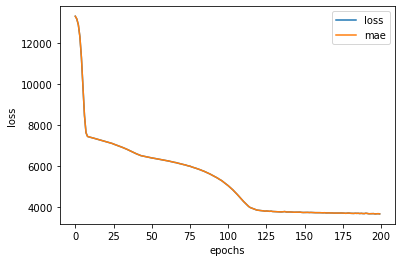

In [21]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [22]:
history.history

{'loss': [13314.818359375,
  13180.2998046875,
  12895.21875,
  12317.162109375,
  11305.86328125,
  9901.33984375,
  8479.166015625,
  7635.12841796875,
  7452.486328125,
  7427.5771484375,
  7409.4130859375,
  7388.39111328125,
  7368.5107421875,
  7347.20263671875,
  7328.95166015625,
  7307.30517578125,
  7288.26025390625,
  7265.47900390625,
  7244.06103515625,
  7221.8330078125,
  7203.568359375,
  7177.35400390625,
  7153.4150390625,
  7129.44091796875,
  7112.02783203125,
  7081.18701171875,
  7053.28271484375,
  7025.8828125,
  6998.3916015625,
  6972.0068359375,
  6941.1552734375,
  6913.52001953125,
  6882.408203125,
  6849.8779296875,
  6817.22314453125,
  6783.01171875,
  6747.01904296875,
  6714.3037109375,
  6674.64501953125,
  6638.35400390625,
  6603.91650390625,
  6572.45947265625,
  6541.29248046875,
  6514.4638671875,
  6498.521484375,
  6477.9599609375,
  6461.8486328125,
  6445.65234375,
  6432.09033203125,
  6418.23974609375,
  6404.53369140625,
  6392.9614257812

TensorFlow stores in a **dictionary** all loss and mae (or the metric you choose when compiling the model), so then it can be accessed an plotted.

> So, how long should you train for?

It depends. But tf has a solution, and it's called [Early Stopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which basically means that the model stops training when doesn't see a significant improvement on it's metrics.

Let's try and implement Early Stopping Callback

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                            patience=10,
                                            verbose=1,
                                            mode='auto',
                                            restore_best_weights=True)

In [24]:
# Create new model to implement callback
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=.001),
                metrics=["mse"])

model_4_history = model_4.fit(X_train, y_train, epochs=500, callbacks=[callback])

/Users/marcosfiesta/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/500
 1/34 [..............................] - ETA: 4s - loss: 13159.5312 - mse: 310817312.0000

2021-12-15 11:26:03.739390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13289.1562 - mse: 320807904.0000
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 13066.0879 - mse: 314484800.0000
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 12507.7480 - mse: 299257408.0000
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 11338.5078 - mse: 269374688.0000
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 9578.6133 - mse: 225884800.0000
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 7971.7959 - mse: 181390592.0000
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 7459.1348 - mse: 157805376.0000
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 7419.0337 - mse: 153631568.0000
Epoch 9/500
34/34 [==============================] - 0s 4ms/step - loss: 7392.8989 - mse: 154092304.0000
Epoch 10/500
34/34 [==============================] - 0s 4ms/st

34/34 [==============================] - 0s 4ms/step - loss: 5292.6226 - mse: 111429824.0000
Epoch 79/500
34/34 [==============================] - 0s 4ms/step - loss: 5223.9043 - mse: 109039392.0000
Epoch 80/500
34/34 [==============================] - 0s 4ms/step - loss: 5148.7334 - mse: 106108672.0000
Epoch 81/500
34/34 [==============================] - 0s 4ms/step - loss: 5076.0889 - mse: 103761536.0000
Epoch 82/500
34/34 [==============================] - 0s 4ms/step - loss: 4992.9189 - mse: 100145080.0000
Epoch 83/500
34/34 [==============================] - 0s 4ms/step - loss: 4904.6318 - mse: 96794712.0000
Epoch 84/500
34/34 [==============================] - 0s 4ms/step - loss: 4803.2734 - mse: 94377232.0000
Epoch 85/500
34/34 [==============================] - 0s 4ms/step - loss: 4708.2568 - mse: 90131848.0000
Epoch 86/500
34/34 [==============================] - 0s 4ms/step - loss: 4599.9463 - mse: 86868224.0000
Epoch 87/500
34/34 [==============================] - 0s 4ms/st

34/34 [==============================] - 0s 4ms/step - loss: 3689.0979 - mse: 47460772.0000
Epoch 156/500
34/34 [==============================] - 0s 4ms/step - loss: 3681.3555 - mse: 47418636.0000
Epoch 157/500
34/34 [==============================] - 0s 4ms/step - loss: 3683.8247 - mse: 47307244.0000
Epoch 158/500
34/34 [==============================] - 0s 4ms/step - loss: 3676.4858 - mse: 47119940.0000
Epoch 159/500
34/34 [==============================] - 0s 4ms/step - loss: 3670.8403 - mse: 47000876.0000
Epoch 160/500
34/34 [==============================] - 0s 4ms/step - loss: 3679.8772 - mse: 46828784.0000
Epoch 161/500
34/34 [==============================] - 0s 4ms/step - loss: 3678.9766 - mse: 46230852.0000
Epoch 162/500
34/34 [==============================] - 0s 4ms/step - loss: 3669.3538 - mse: 46502256.0000
Epoch 163/500
34/34 [==============================] - 0s 4ms/step - loss: 3665.8115 - mse: 46449152.0000
Epoch 164/500
34/34 [==============================] - 0s 4m

34/34 [==============================] - 0s 4ms/step - loss: 3528.2151 - mse: 42894136.0000
Epoch 233/500
34/34 [==============================] - 0s 4ms/step - loss: 3531.2610 - mse: 42993964.0000
Epoch 234/500
34/34 [==============================] - 0s 4ms/step - loss: 3529.1470 - mse: 43184012.0000
Epoch 235/500
34/34 [==============================] - 0s 4ms/step - loss: 3560.2534 - mse: 43102400.0000
Epoch 236/500
34/34 [==============================] - 0s 4ms/step - loss: 3527.2910 - mse: 43407504.0000
Epoch 237/500
34/34 [==============================] - 0s 4ms/step - loss: 3531.6479 - mse: 43484604.0000
Epoch 238/500
34/34 [==============================] - 0s 4ms/step - loss: 3524.7258 - mse: 43533764.0000
Epoch 239/500
34/34 [==============================] - 0s 4ms/step - loss: 3527.7957 - mse: 43877500.0000
Epoch 240/500
34/34 [==============================] - 0s 4ms/step - loss: 3533.4507 - mse: 43812572.0000
Epoch 241/500
34/34 [==============================] - 0s 4m

In [25]:
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3171.3203 - mse: 42794228.0000


2021-12-15 11:26:44.012859: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3171.3203125, 42794228.0]

Text(0, 0.5, 'loss')

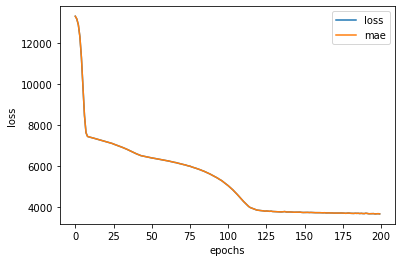

In [26]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')

In [27]:
model_3.evaluate(X_test, y_test)

1/9 [==>...........................] - ETA: 0s - loss: 3840.0044 - mae: 3840.0044

2021-12-15 11:26:44.180140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 4ms/step - loss: 3506.1880 - mae: 3506.1880


[3506.18798828125, 3506.18798828125]

## Preprocessing data (normalization and standardization)

In [28]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


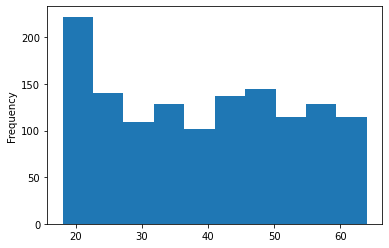

In [44]:
X.age.plot(kind="hist");

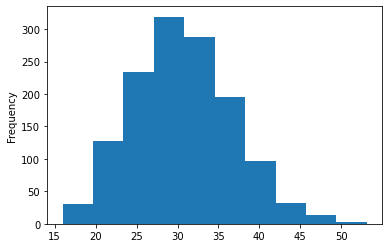

In [45]:
X.bmi.plot(kind="hist");

In [31]:
X.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

These three variables have different range of values. It's better for a Neural Network to have all values in the same range.

For this, we have two technics:
* Normalization: converts all values to between 0 and 1 whilst preserving the original distribution.
* Standardization: removes the mean and divides each value by the standard deviation.

In term of scaling values, neural networks tend to prefer normalization.

In [32]:
# Check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


To prepare our data, we'll borrow a few classes from Scikit-Learn

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer( # receives a tuple with (function(), [columns])
    (MinMaxScaler(), ["age", "bmi", "children"]), # Turn these values 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y just in case
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train & test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [34]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [35]:
X_train_normal[:5]

array([[0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.45652174, 0.49394673, 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ],
       [0.7826087 , 0.14823783, 0.6       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]])

In [36]:
# Check the shapes of our data
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one-hot-encoded. Now let's model it.

In [37]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Build a neural network model to fit on our normalized data
# Set random seed
tf.random.set_seed(42)

# Create model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model_5
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=.01),
                metrics=["mae"])

# Fit model_5
model_5.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/34 [==========>...................] - ETA: 0s - loss: 12941.5742 - mae: 12941.5742

/Users/marcosfiesta/miniforge3/envs/tensorflow_m1/lib/python3.9/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
2021-12-15 11:26:44.608758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 5ms/step - loss: 13240.8271 - mae: 13240.8271
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 11523.3564 - mae: 11523.3564
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 8180.4248 - mae: 8180.4248
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7615.3521 - mae: 7615.3521
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7131.3540 - mae: 7131.3540
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6549.2935 - mae: 6549.2935
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 5649.3022 - mae: 5649.3022
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 4490.1436 - mae: 4490.1436
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3761.3479 - mae: 3761.3479
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 3678.3850 - mae: 3678.3850
Epoch 1

34/34 [==============================] - 0s 4ms/step - loss: 3490.5476 - mae: 3490.5476
Epoch 83/100
34/34 [==============================] - 0s 4ms/step - loss: 3493.1426 - mae: 3493.1426
Epoch 84/100
34/34 [==============================] - 0s 4ms/step - loss: 3500.2109 - mae: 3500.2109
Epoch 85/100
34/34 [==============================] - 0s 4ms/step - loss: 3480.9353 - mae: 3480.9353
Epoch 86/100
34/34 [==============================] - 0s 4ms/step - loss: 3486.2886 - mae: 3486.2886
Epoch 87/100
34/34 [==============================] - 0s 5ms/step - loss: 3491.4741 - mae: 3491.4741
Epoch 88/100
34/34 [==============================] - 0s 4ms/step - loss: 3487.6968 - mae: 3487.6968
Epoch 89/100
34/34 [==============================] - 0s 4ms/step - loss: 3496.7471 - mae: 3496.7471
Epoch 90/100
34/34 [==============================] - 0s 4ms/step - loss: 3490.4209 - mae: 3490.4209
Epoch 91/100
34/34 [==============================] - 0s 4ms/step - loss: 3488.2939 - mae: 3488.2939
Epo

In [39]:
# Evaluate model_5 (trained on normalized data)
model_5.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3173.8306 - mae: 3173.8306


2021-12-15 11:26:58.408743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3173.83056640625, 3173.83056640625]

In [40]:
# Remember model_2 results
# 9/9 [==============================] - 0s 402us/step - loss: 3167.3213 - mae: 3167.3213

Normalizing data may not have brought substantial improvements in this case, but is worth implementing because of faster converging time, and easy to do.

### Try and improve the results we got on the insurance dataset

Some things you might want to try include:

   * Building a larger model (how does one with 4 dense layers go?).
   * Increasing the number of units in each layer.
   * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
   * What happens if you train for longer (say 300 epochs instead of 200)?

In [41]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([# larger model with 4 dense layers
    tf.keras.layers.Dense(128), # increased number of units in each layer
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
               metrics=["mae"])

model_6_history = model_6.fit(X_train_normal,
                              y_train,
                              epochs=300) # train for longer

Epoch 1/300
18/34 [==============>...............] - ETA: 0s - loss: 12373.1309 - mae: 12373.1309

2021-12-15 11:26:58.657977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 7ms/step - loss: 10610.0537 - mae: 10610.0537
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 6488.5244 - mae: 6488.5244
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 3854.1606 - mae: 3854.1606
Epoch 4/300
34/34 [==============================] - 0s 4ms/step - loss: 3662.5674 - mae: 3662.5674
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 3606.0203 - mae: 3606.0203
Epoch 6/300
34/34 [==============================] - 0s 5ms/step - loss: 3659.8408 - mae: 3659.8408
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 3571.5015 - mae: 3571.5015
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 3658.2175 - mae: 3658.2175
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 3578.8340 - mae: 3578.8340
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 3711.1375 - mae: 3711.1375
Epoch 11/

34/34 [==============================] - 0s 4ms/step - loss: 3601.9175 - mae: 3601.9175
Epoch 83/300
34/34 [==============================] - 0s 4ms/step - loss: 3617.2961 - mae: 3617.2961
Epoch 84/300
34/34 [==============================] - 0s 4ms/step - loss: 3589.6736 - mae: 3589.6736
Epoch 85/300
34/34 [==============================] - 0s 4ms/step - loss: 3565.0129 - mae: 3565.0129
Epoch 86/300
34/34 [==============================] - 0s 5ms/step - loss: 3600.5339 - mae: 3600.5339
Epoch 87/300
34/34 [==============================] - 0s 5ms/step - loss: 3650.4551 - mae: 3650.4551
Epoch 88/300
34/34 [==============================] - 0s 4ms/step - loss: 3587.5334 - mae: 3587.5334
Epoch 89/300
34/34 [==============================] - 0s 4ms/step - loss: 3550.4031 - mae: 3550.4031
Epoch 90/300
34/34 [==============================] - 0s 4ms/step - loss: 3593.8711 - mae: 3593.8711
Epoch 91/300
34/34 [==============================] - 0s 4ms/step - loss: 3561.0779 - mae: 3561.0779
Epo

34/34 [==============================] - 0s 4ms/step - loss: 3535.9885 - mae: 3535.9885
Epoch 163/300
34/34 [==============================] - 0s 4ms/step - loss: 3524.1042 - mae: 3524.1042
Epoch 164/300
34/34 [==============================] - 0s 4ms/step - loss: 3598.8271 - mae: 3598.8271
Epoch 165/300
34/34 [==============================] - 0s 4ms/step - loss: 3612.8105 - mae: 3612.8105
Epoch 166/300
34/34 [==============================] - 0s 4ms/step - loss: 3532.9014 - mae: 3532.9014
Epoch 167/300
34/34 [==============================] - 0s 4ms/step - loss: 3544.1541 - mae: 3544.1541
Epoch 168/300
34/34 [==============================] - 0s 6ms/step - loss: 3531.9197 - mae: 3531.9197
Epoch 169/300
34/34 [==============================] - 0s 4ms/step - loss: 3574.4717 - mae: 3574.4717
Epoch 170/300
34/34 [==============================] - 0s 4ms/step - loss: 3546.2205 - mae: 3546.2205
Epoch 171/300
34/34 [==============================] - 0s 4ms/step - loss: 3549.4927 - mae: 3549

34/34 [==============================] - 0s 4ms/step - loss: 3557.7861 - mae: 3557.7861
Epoch 243/300
34/34 [==============================] - 0s 4ms/step - loss: 3550.6743 - mae: 3550.6743
Epoch 244/300
34/34 [==============================] - 0s 4ms/step - loss: 3485.5320 - mae: 3485.5320
Epoch 245/300
34/34 [==============================] - 0s 4ms/step - loss: 3684.3037 - mae: 3684.3037
Epoch 246/300
34/34 [==============================] - 0s 4ms/step - loss: 3565.7476 - mae: 3565.7476
Epoch 247/300
34/34 [==============================] - 0s 4ms/step - loss: 3574.2991 - mae: 3574.2991
Epoch 248/300
34/34 [==============================] - 0s 4ms/step - loss: 3591.9414 - mae: 3591.9414
Epoch 249/300
34/34 [==============================] - 0s 4ms/step - loss: 3564.8435 - mae: 3564.8435
Epoch 250/300
34/34 [==============================] - 0s 4ms/step - loss: 3608.9417 - mae: 3608.9417
Epoch 251/300
34/34 [==============================] - 0s 4ms/step - loss: 3524.4219 - mae: 3524

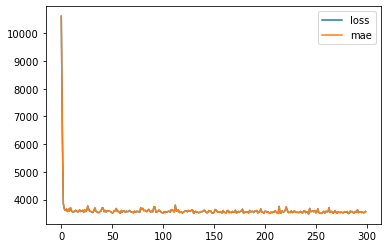

In [42]:
pd.DataFrame(model_6_history.history).plot();

`model_6` doesn't seem to be improving...

In [43]:
model_6.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3160.5388 - mae: 3160.5388


2021-12-15 11:27:43.076045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[3160.538818359375, 3160.538818359375]